# TECHNO-HACK INTERNSHIP

# VIRTUAL INTERNSHIP ON DATA SCIENCE

**1. Fraud Transaction Detection**

In [1]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading the Dataset

dataset = pd.read_csv(r"C:\Users\pawan\OneDrive\Desktop\creditcard.csv")

In [3]:
# First 10 Rows

dataset.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
dataset['Class'].sum()

2

**The dataset has major class imbalance problem. We see the fraud cases less than valid transactions**

In [5]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Fraud Cases: 2
Valid Transactions: 997


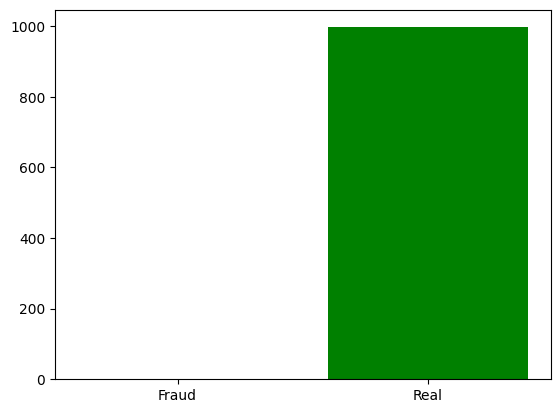

In [6]:
label_size = [dataset['Class'].sum(), len(dataset['Class'])- dataset['Class'].sum()]
plt.bar(['Fraud','Real'],label_size,color="green")
print('Fraud Cases: {}'.format(len(dataset[dataset['Class'] == 1]))) 
print('Valid Transactions: {}'.format(len(dataset[dataset['Class'] == 0]))) 

In [7]:
label_size

[2, 997]

**Fraud Cases :**

In [8]:
print('Fraud cases')
print(dataset[dataset['Class']==1]['Amount'].describe())

Fraud cases
count      2.000000
mean     264.500000
std      374.059487
min        0.000000
25%      132.250000
50%      264.500000
75%      396.750000
max      529.000000
Name: Amount, dtype: float64


**Valid Cases :**

In [9]:
print('Valid transactions')
print(dataset[dataset['Class']==0]['Amount'].describe())

Valid transactions
count     997.000000
mean       66.091555
std       186.959217
min         0.000000
25%         5.450000
50%        16.190000
75%        55.000000
max      3828.040000
Name: Amount, dtype: float64


**Spliting The Data :**

In [10]:
#separating the X and the Y values

X = dataset.drop(['Class'], axis = 1) 
y = dataset["Class"].values

In [11]:
print(X.shape) 
print(y.shape) 


(999, 30)
(999,)


In [12]:
X = X.values
X

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811730e-02, ...,
         1.33558377e-01, -2.10530530e-02,  1.49620000e+02],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
        -8.98309900e-03,  1.47241690e-02,  2.69000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.53527940e-02, -5.97518410e-02,  3.78660000e+02],
       ...,
       [ 7.52000000e+02, -2.10117149e+00, -2.27365439e-01, ...,
         3.23580117e-01,  3.46220550e-02,  1.78000000e+00],
       [ 7.53000000e+02, -1.24816321e+00,  3.15246349e-01, ...,
         9.75551610e-02, -6.70480102e-01,  3.00000000e+01],
       [ 7.55000000e+02,  1.37413406e+00, -1.76721037e+00, ...,
         6.88172780e-02,  3.80093000e-02,  8.23700000e+01]])

**Train-Test Split :**

In [13]:
#training and testing data bifurcation
from sklearn.model_selection import train_test_split 

#split the data into training and testing sets 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 37)

**ML Model :**

**I used SVC - Support Vector Classifier. The predicted values is displayed along with the actual outcomes.**

In [14]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
df = pd.DataFrame({'Predicted values' : y_pred, 'Actual_values': y_test})
df

,Predicted values,Actual_values
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
495,0,0
496,0,0
497,0,0
498,0,0


# Results :

In [15]:
#building all kinds of evaluating parameters
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix 
  
n_errors = (y_pred != y_test).sum() 
print("The model used is Support Vector classifier") 
  
acc = accuracy_score(y_test, y_pred) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(y_test, y_pred,average='weighted', labels=np.unique(y_pred)) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred)) 
print("The recall is {}".format(rec)) 
  
f1 = f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred)) 
print("The F1-Score is {}".format(f1))

The model used is Support Vector classifier
The accuracy is 0.998
The precision is 0.998
The recall is 1.0
The F1-Score is 0.998998998998999
